In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets,layers,models

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

## Data Visualization

In [9]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [10]:
# training samples are 50000, image size 32*32, 3 shows rgb channels
# testing samples are 10000, image size 32*32 ,3 for rgb channels

In [18]:
Y_test.shape,Y_train.shape

((10000, 1), (50000, 1))

In [24]:
Y_train[:6] #this is 2D array but donot neet 2D array

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [38]:
Y_train=Y_train.reshape(-1,)
Y_train[:6] # now this is 1D array 

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [73]:
Y_test=Y_test.reshape(-1,)

In [101]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# CIFAR10 contains these classes of images
# 'airplane'-0
# 'automobile'-1
# 'bird'-2
# 'cat'-3
# 'deer'-4
# 'dog'-5
# 'frog'-6
# 'horse'-7
# 'ship'-8
# 'truck'-9

In [89]:
def plot_sample(X,Y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

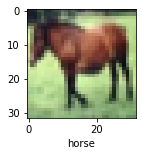

In [90]:
plot_sample(X_train,Y_train,7)

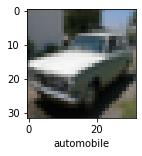

In [93]:
plot_sample(X_train,Y_train,96)

  ## Artificial Neural Network

In [46]:
X_train=X_train/255
X_test=X_test/255

In [52]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [53]:
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])


### Training

In [54]:
ann.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.8582 - accuracy: 0.3340
Epoch 2/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.6557 - accuracy: 0.4154
Epoch 3/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.5673 - accuracy: 0.4455
Epoch 4/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.5039 - accuracy: 0.4679
Epoch 5/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.4535 - accuracy: 0.4873


### Evaluating And Testing

In [55]:
ann.evaluate(X_test,Y_test)

313/313 [==============================] - 7s 21ms/step - loss: 1.4773 - accuracy: 0.4718


[1.477262258529663, 0.4717999994754791]

In [56]:
# Artificial Neural Network gives accuracy 47.18% and that is very low 

In [96]:
Y_pred[100] #it will give the probabilities of all class types for the picture at index 100

array([2.0307153e-03, 5.8349251e-05, 5.9869468e-02, 4.7960505e-02,
       7.4774313e-01, 9.4742239e-02, 6.2243859e-03, 3.8568504e-02,
       2.2864249e-03, 5.1638426e-04], dtype=float32)

In [66]:
Y_test[100]

array([4], dtype=uint8)

## Convolutional Neural Network

In [70]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [71]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

### Training

In [72]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4997 - accuracy: 0.4621
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1552 - accuracy: 0.5939
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0298 - accuracy: 0.6422
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9473 - accuracy: 0.6704
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8898 - accuracy: 0.6924
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8467 - accuracy: 0.7051
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8009 - accuracy: 0.7223
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7677 - accuracy: 0.7303
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7311 - accuracy: 0.7448
Epoch 10/10
1563/1563 [==============================] - 52s 33m

### Evaluating And Testing

In [74]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9187 - accuracy: 0.6898


[0.9187239408493042, 0.6898000240325928]

In [75]:
# Convolutional Neural Network gives accuracy as 68.98% and that is high as compared to ANN

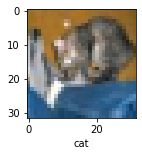

In [99]:
plot_sample(X_test,Y_test,0)

In [94]:
Y_pred=cnn.predict(X_test)

In [97]:
 Y_pred[0]

array([2.0237952e-02, 1.3467384e-04, 2.5533648e-02, 6.4383358e-01,
       3.2871601e-04, 2.6573673e-01, 3.5355069e-02, 2.4201792e-04,
       8.4724966e-03, 1.2520749e-04], dtype=float32)

In [103]:
Y_classes=[np.argmax(element) for element in Y_pred]
Y_classes[:10]

[3, 1, 8, 0, 6, 6, 1, 6, 3, 1]

In [104]:
Y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

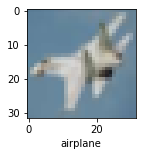

In [105]:
plot_sample(X_test,Y_test,10)

In [106]:
classes[Y_classes[10]] 

'airplane'

In [110]:
# correct

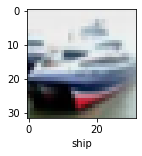

In [111]:
plot_sample(X_test,Y_test,1)

In [112]:
classes[Y_classes[1]] 

'automobile'

In [115]:
# incorrect

In [125]:
cnn.save("model1_cifar.h5")


In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

#load the trained model to classify the images

from keras.models import load_model
model = load_model('model1_cifar.h5')

#dictionary to label all the CIFAR-10 dataset classes.

classes = { 
    0:'aeroplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck' 
}
#initialise GUI

top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification CIFAR10')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,
  padx=10,pady=5)

upload.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification CIFAR10",pady=20, font=('arial',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
cat
